# pyGAM : Getting Started with Generalized Additive Models in Python

https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f

by Pablo Oberhauser, Nov 27, 2017

Keywords: Machine Learning, Statistics, Python

I came across pyGAM a couple months ago, but found few examples online. Below is a more practical extension to the documentation found in the pyGAM homepage.

https://github.com/dswah/pyGAM

Generalized additive models are an extension of generalized linear models. They provide a modeling approach that combines powerful statistical learning with interpretability, smooth functions, and flexibility. As such, they are a solid addition to the data scientist’s toolbox.

FYI: This tutorial will not focus on the theory behind GAMs. For more information on that there is an amazing blog post by Kim Larsen here:

https://multithreaded.stitchfix.com/blog/2015/07/30/gam/

Or for a much more in depth read check out Simon. N. Wood’s great book, “Generalized Additive Models: an Introduction in R”

Some of the major development in GAMs has happened in the R front lately with the `mgcv` package by Simon N. Wood. At our company, we had been using GAMs with modeling success, but needed a way to integrate it into our python-based “machine learning for production” framework.

Enter pyGAM.

## Installation

Installation is simple

In [78]:
# ! pip install --user pygam
# ! pip install --user matplotlib
# ! pip3 install sklearn  # didn't work
# ! pip3 install scikit-learn 

pyGAM also makes use of scikit-sparse which you can install via conda. Not doing so will result in a warning and potential problems with the slowing down of optimization for models with monotonicity/convexity penalties.

In [79]:
# Import modules

import matplotlib.pyplot as plt  # added
import numpy as np
import pandas as pd

from pygam import LinearGAM
from pygam import LogisticGAM
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

## Classification Example

Let’s walk through a classification example…

We import `LogisticGAM` to begin the classification training process, and `load_breast_cance`r for the data. This data contains 569 observations and 30 features. The target variable in this case is whether the tumor of malignant or benign, and the features are several measurements of the tumor. For showcasing purposes, we keep the first 6 features only.

In [80]:
# load the breast cancer data set
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [82]:
# keep first 6 features only
keep = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness']

X = df[keep]
y = pd.Series(data.target)

# Description of sample classification feature data
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


## Building the model

Since this is a classification problem, we want to make sure we use pyGam’s `LogisticGAM()` function.

In [83]:
# Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)

The `summary()` function provides a statistical summary of the model. In the diagnostics below, we can see statistical metrics such as AIC, UBRE, log likelihood, and pseudo-R² measures.

In [84]:
# Model summary
gam.summary()  # added

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.4476
Link Function:                        LogitLink Log Likelihood:                                   -54.0256
Number of Samples:                          569 AIC:                                              146.9464
                                                AICc:                                             148.5483
                                                UBRE:                                               2.2856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8562
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_33957/3382240898.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()  # added


To get the training accuracy we simply run:

In [85]:
gam.accuracy(X, y)

0.9560632688927944

And we get a 0.9613 accuracy right off the bat.

One of the nice things about GAMs is that their additive nature allows us to explore and interpret individual features by holding others at their mean. The snippet of code below shows these plots for the features included in the trained model. `generate_X_grid` helps us build a grid for nice plotting.

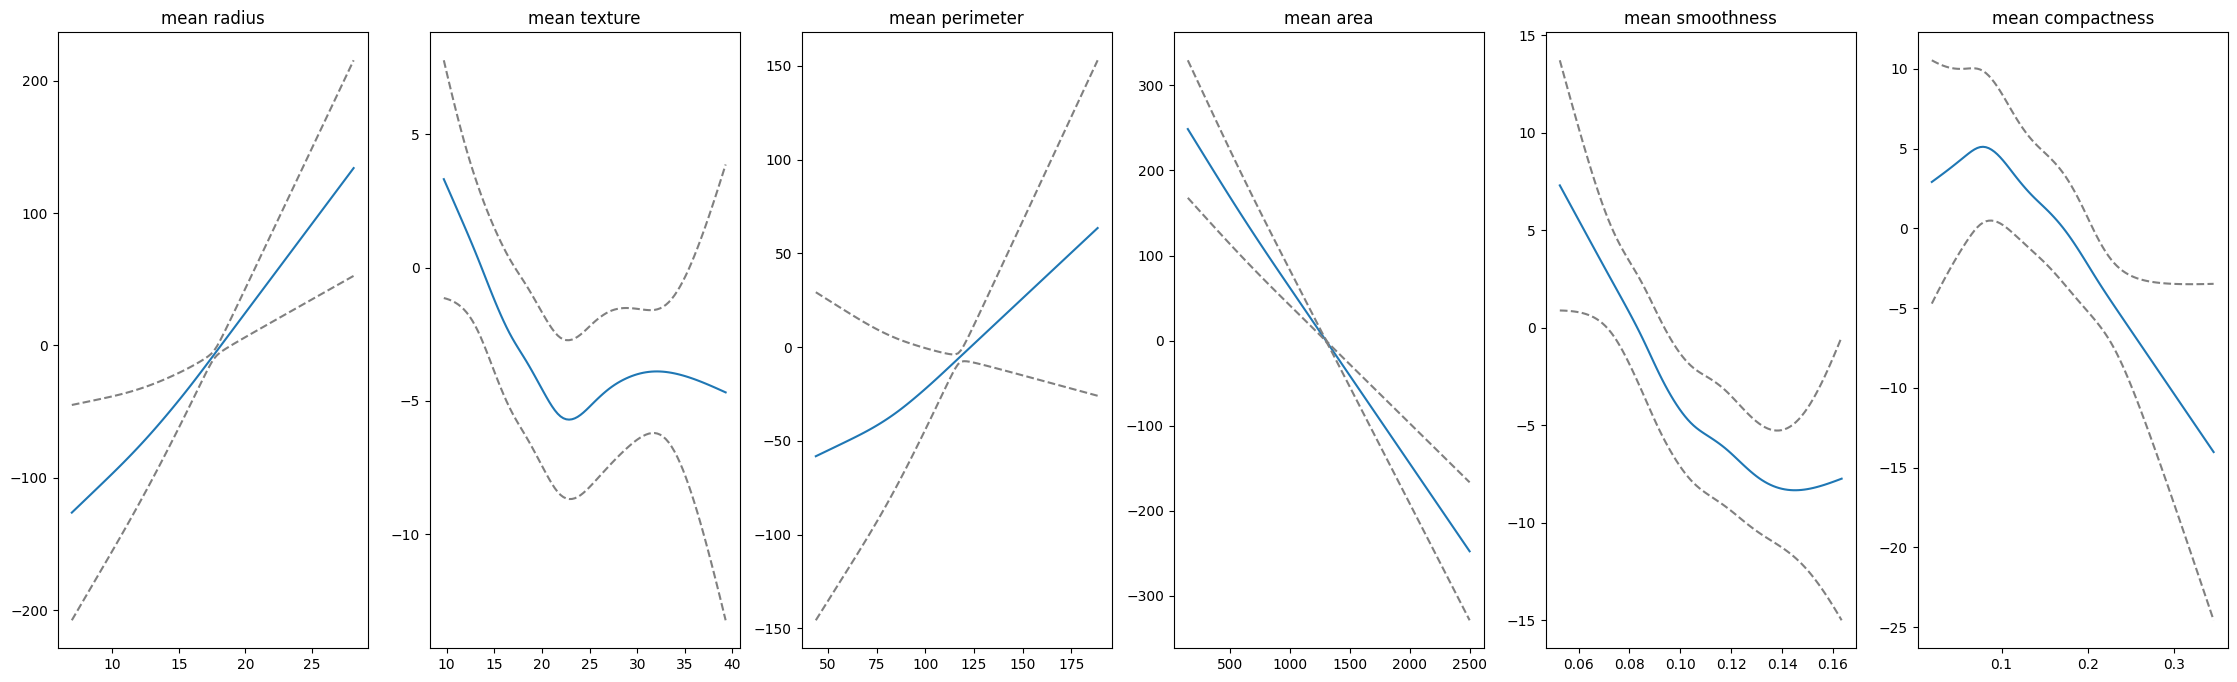

In [86]:
# Partial dependency plots with confidence intervals

plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(keep))
titles = keep 

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

We can already see some very interesting results. It is clear that some features have a fairly simple linear relationship with the target variable. There are about three features that seem to have strong non-linear relationships though. We will want to combine the interpretability of these plots, and the power to prevent over fitting in GAMs to come up with a model that generalizes well to a holdout set of data.

Partial dependency plots are extremely useful because they are highly interpretable and easy to understand. For example at first examination we can tell that there is a very strong relationship between the mean radius of the tumor and the response variable. The bigger the radius of the tumor, the more likely it is to be malignant. Other features like the mean texture are harder to decipher, and we can already infer that we might want to make that a smoother line (we walk through smoothing parameters in the next section).

## Tuning Smoothness and Penalties

This is where the functionality of pyGAM begins to really shine through. We can choose to build a grid for parameter tuning or we can use intuition and domain expertise to find optimal smoothing penalties for the model.

Main parameters to keep in mind are:

- `n_splines`

- `lam`

- `constraints`

`n_splines` refers to the number of splines to use in each of the smooth function that is going to be fitted.

`lam` is the penalization term that is multiplied to the second derivative in the overall objective function.

`constraints` is a list of constraints that allows the user to specify whether a function should have a monotonically constraint. This needs to be a string in `['convex', 'concave', 'monotonic_inc', 'monotonic_dec', 'circular', 'none']`.

The default parameters that are being used in the model presented above are the following:

- `n_splines` = 25

- `lam` = 0.6

- `constraints` = None

So let’s play around with `n_splines`. Let’s say for example we think mean texture is too “un-smooth” at the moment. We change parameter list to the following: (Note that another cool thing about pyGAM is that we can specify one single value of lambda and it will be copied to all of the functions. Otherwise, we can specify each one in a list:

In [87]:
lambda_ = 0.6
n_splines = [25, 6, 25, 25, 6, 4] 
constraints = None

gam = LogisticGAM(
    constraints=constraints, 
    lam=lambda_,
    n_splines=n_splines
).fit(X, y)

In [88]:
gam.accuracy(X, y)  # added

0.9507908611599297

which changes our training accuracy to 0.9507.

And now the partial dependency plots look like so:

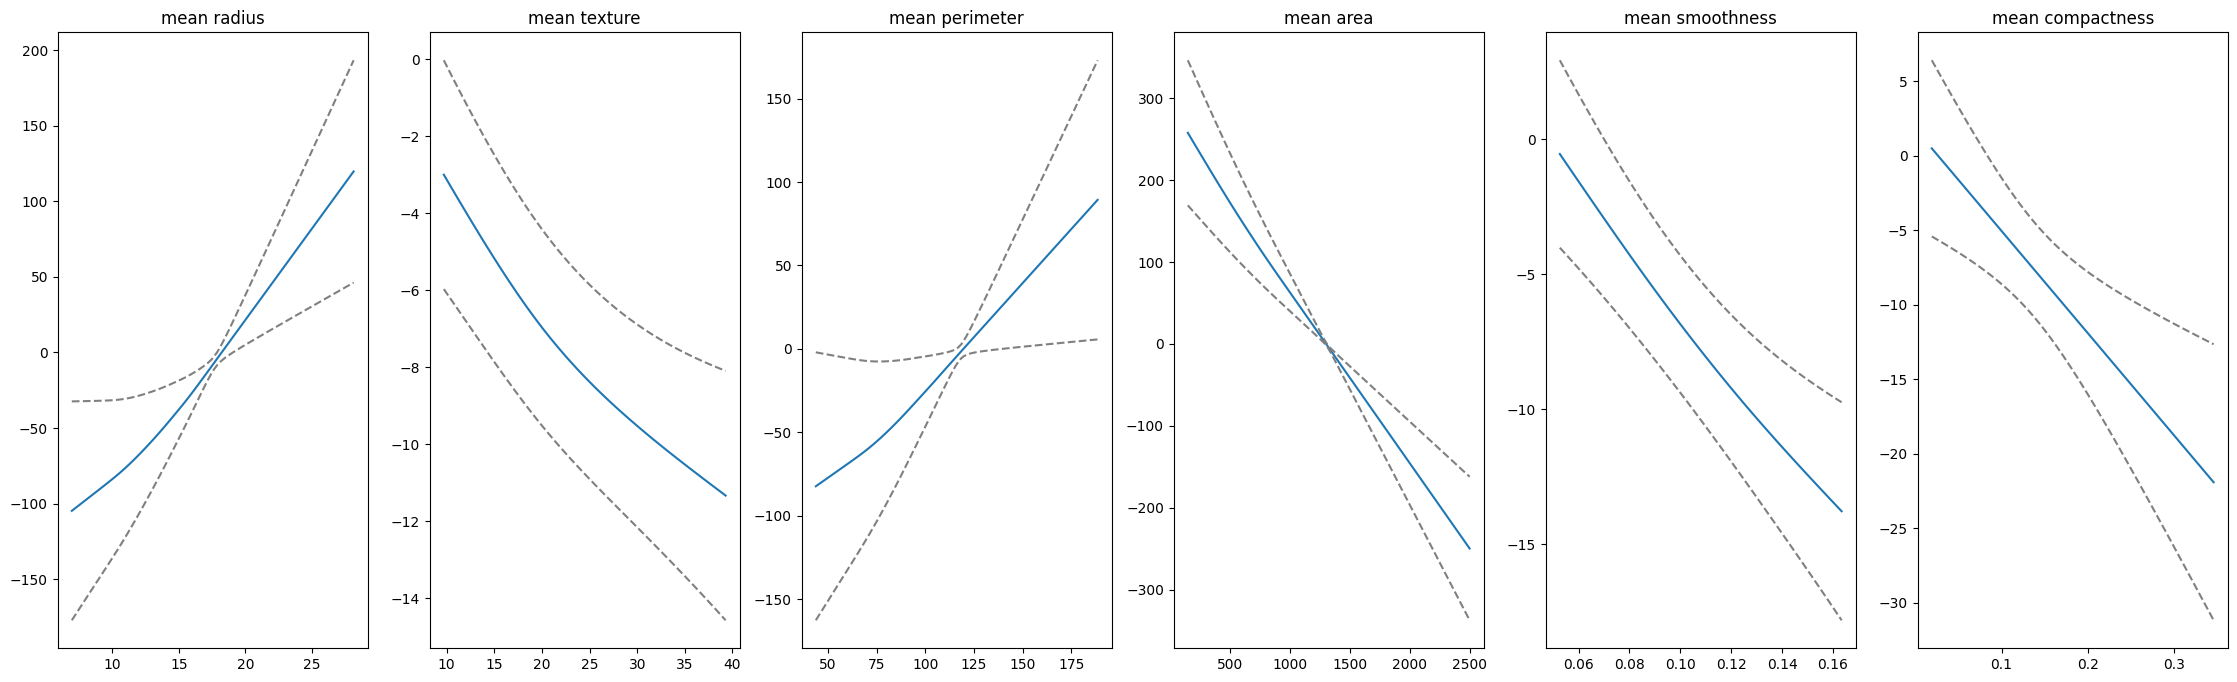

In [89]:
# Partial dependency plots with confidence intervals

plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(keep))
titles = keep  # was data.feature_names

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

Mean texture, mean smoothness, and mean compactness changed.

The drop in accuracy tells us that there is some information we are not capturing by smoothing the mean texture estimator that much, but it highlights how the analyst can encode intuition into the modeling process.

Keep in mind that `n_splines` is only one parameter to change. Lambda controls how much we penalize ‘wiggliness’, so even if we keep a large value for `n_splines` we could get a straight line if lambda is large enough. Tuning these can be labor intensive, but there is an automated way to do this in pyGAM.

## Grid search with pyGAM

The `gridsearch()` function creates a grid to search over smoothing parameters. This is one of the coolest functionalities in pyGAM because it is very easy to create a custom grid search. One can easily add parameters and ranges. For example, the default arguments are a dictionary of possible lambdas to create a grid search `{'lam':np.logspace(-3, 3, 11)}`.

And just like the default argument is shows, we can add more and more arguments to the function and thus create a custom grid search.

```
gam = LogisticGAM().gridsearch(X, y)
```

## Generalizing a GAM

Using a holdout set is the best way to balance bias-variance trade off in models. GAMs do a very good job at allowing the analyst to directly control over fitting in a statistical learning model.

pyGAM really plays nice with the sklearn workflow, so once it is installed it’s basically like fitting a sklearn model.

We can split the data just like we usually would:

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean radius       569 non-null    float64
 1   mean texture      569 non-null    float64
 2   mean perimeter    569 non-null    float64
 3   mean area         569 non-null    float64
 4   mean smoothness   569 non-null    float64
 5   mean compactness  569 non-null    float64
dtypes: float64(6)
memory usage: 26.8 KB


In [91]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: None
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
gam = LogisticGAM().gridsearch(X_train.values, y_train.values)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
/Users/robertandrewstevens/Library/Python/3.9/lib/python/site-packages/pygam/links.py:151: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/Users/robertandrewstevens/Library/Python/3.9/lib/python/site-packages/pygam/pygam.py:629: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
/Users/robertandrewstevens/Library/Python/3.9/lib/python/site-packages/pygam/links.py:135: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
/Users/robertandrewstevens/Library/Python/3.9/lib/python/site-packages/pygam/links.py:136: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
/Users/robertandrewstevens/Library/Python/3.9/lib/python/site-packages/pygam/links.py:151: RuntimeWarning: overflow encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/Users/rob

Predict classes or probabilities and use sklearn metrics for accuracy:

In [94]:
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))  # Accuracy: 0.957446808511, 

Accuracy: 0.9574468085106383 


In [95]:
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))  # Log Loss: 0.126179009744

Log Loss: 0.1163122543453841 


Let’s try a model that better generalizes. To do so, we can reduce the number of splines and see how the holdout set errors turn out.

In [96]:
lambda_ = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
n_splines = [4, 14, 4, 6, 12, 12] 
constraints = [None, None, None, None, None, None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
gam = LogisticGAM(
    constraints=constraints, 
    lam=lambda_,
    n_splines=n_splines
).fit(X_train, y_train) 

In [98]:
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))  # Accuracy: 0.968085106383

Accuracy: 0.9680851063829787 


In [99]:
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))  # Log Loss: 0.0924671883985

Log Loss: 0.10707673143908684 


## Regression

Switching to a regression context is simple:

In [100]:
# from sklearn.datasets import load_boston

# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# target_df = pd.Series(boston.target)

# used alternative data source due to error message
#     `load_boston` has been removed from scikit-learn since version 1.2.

# data_url = "http://lib.stat.cmu.edu/datasets/boston"  # blocked?
data_url = "boston.txt"  # manually downloaded and moved to working directory (manually removed line breaks)
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

```
http://lib.stat.cmu.edu/datasets/boston

CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's
```

In [101]:
col_names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]

In [102]:
raw_df.columns = col_names
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [103]:
raw_df.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [104]:
features = col_names[0:6]
X = raw_df[features].values
y = raw_df["MEDV"].values

In [105]:
type(X)

numpy.ndarray

In [106]:
X[:5, :]

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00],
       [2.731e-02, 0.000e+00, 7.070e+00, 0.000e+00, 4.690e-01, 6.421e+00],
       [2.729e-02, 0.000e+00, 7.070e+00, 0.000e+00, 4.690e-01, 7.185e+00],
       [3.237e-02, 0.000e+00, 2.180e+00, 0.000e+00, 4.580e-01, 6.998e+00],
       [6.905e-02, 0.000e+00, 2.180e+00, 0.000e+00, 4.580e-01, 7.147e+00]])

In [107]:
type(y)

numpy.ndarray

In [108]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

Data for regression problem

In [109]:
gam = LinearGAM(n_splines=10).gridsearch(X, y)
gam.summary()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:09
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:04
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:04
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     41.4216
Link Function:                     IdentityLink Log Likelihood:                                 -1983.9983
Number of Samples:                          506 AIC:                                             4052.8399
                                                AICc:                                             4060.804
                                                GCV:                                               23.0276
                                                Scale:                                             19.6614
                                                Pseudo R-Squared:                                   0.7862
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_33957/4172344406.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## Regression GAM summary

And we can similarly plot the feature dependencies:

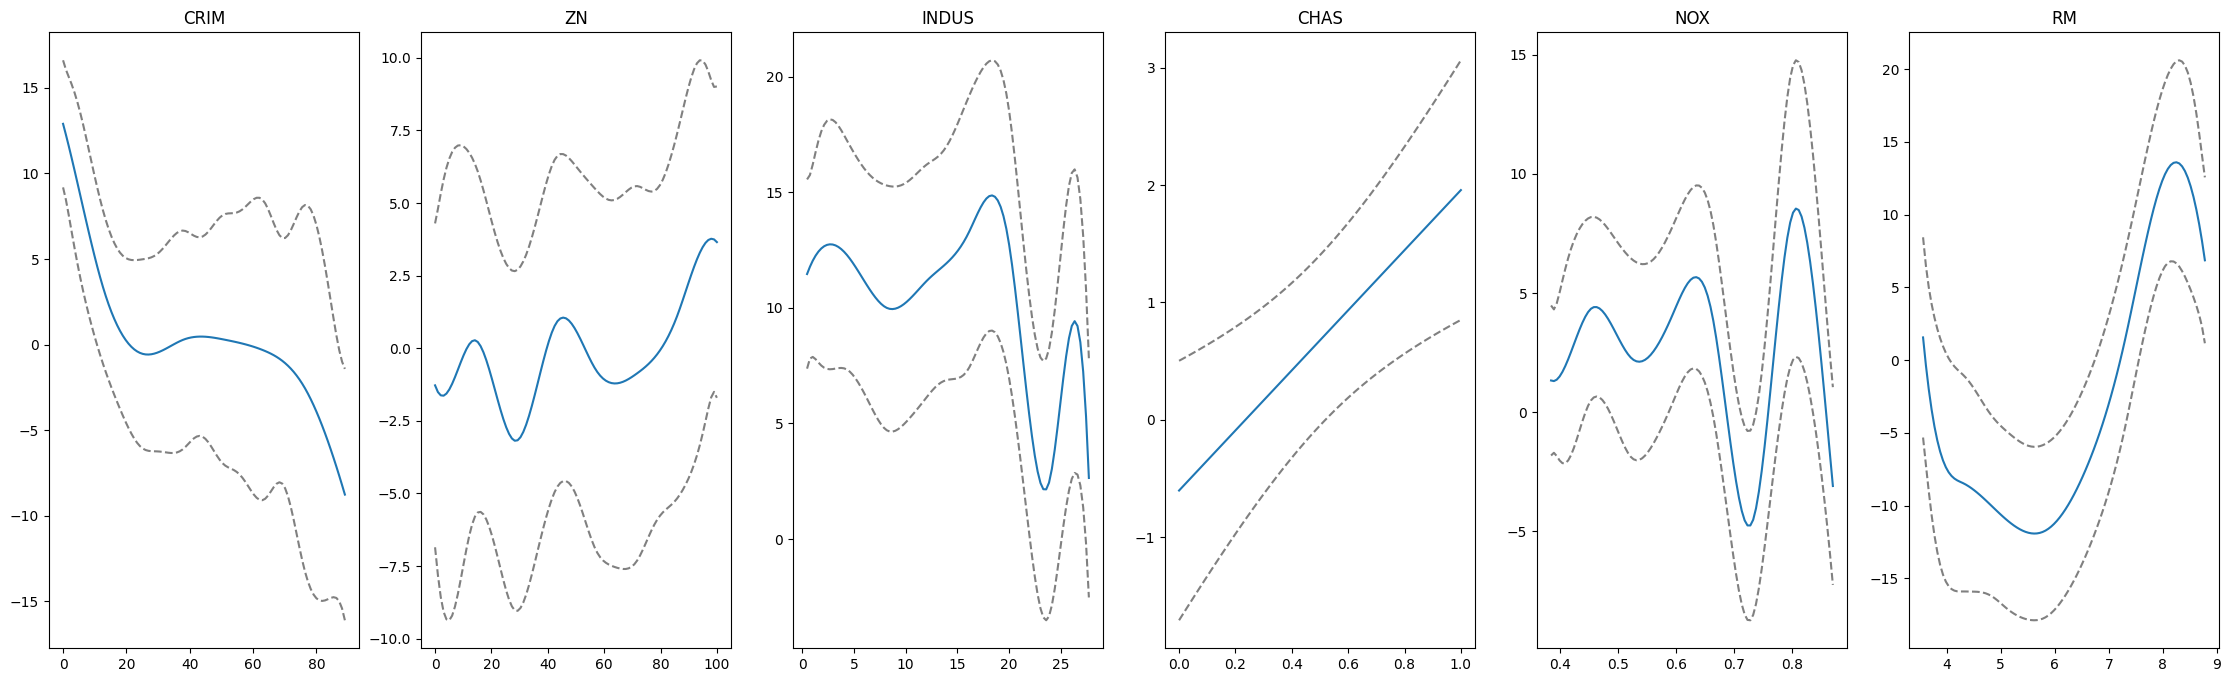

In [110]:
# Regression partial dependency plots

plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(features))
titles = features

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

There are many more features and knobs to turn when building a GAM. Stay tuned for the advanced tutorial on further generalizing a GAM, CV for feature and smoothness selection, residual diagnostics, and more.